<a href="https://colab.research.google.com/github/jaeohshin/keras/blob/main/tutorial2_classifying_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here ML for the classifying news articles based on the words.

One news article can be one of 46 possible categories.

In [1]:
# download data

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
#train_data[0]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])



In [6]:
train_labels[3]

4

In [7]:
#Vectorize the data 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [9]:
len(train_labels)

8982

In [10]:
len(x_train)

8982

In [11]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [12]:
#def to_one_hot(labels, dimension=46):
#    results = np.zeros(len(labels), dimension)
#  for i, label in enumerate(labels):
#      results[i, label] = 1.
#  return results

#y_train = to_one_hot(train_labels)
#y_test = to_one_hot(test_labels)

In [13]:
# Vectorize the labels.

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [40]:
# Define the DL model
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [41]:
# model compile

model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [16]:
# Separate the train data into "real train" data and validation data
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [42]:
history = model2.fit(partial_x_train, partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.3443 - accuracy: 0.5220 - val_loss: 1.5068 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.2838 - accuracy: 0.7167 - val_loss: 1.1933 - val_accuracy: 0.7380
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9677 - accuracy: 0.7897 - val_loss: 1.0337 - val_accuracy: 0.7720
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7366 - accuracy: 0.8420 - val_loss: 0.9715 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5769 - accuracy: 0.8753 - val_loss: 0.8931 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4561 - accuracy: 0.9023 - val_loss: 0.8534 - val_accuracy: 0.8220
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.3651 - accuracy: 0.9218 - val_loss: 0.8670 - val_accuracy: 0.8110
Epoch 8/20
16

In [43]:
import matplotlib.pyplot as plt

history_dict = history.history

In [33]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

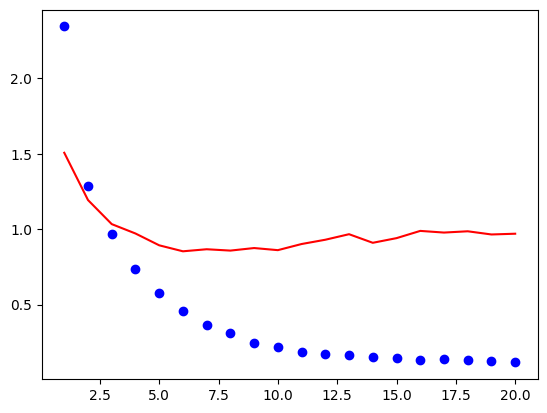

In [44]:
tr_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]


n = range(1, len(tr_loss)+1)

plt.plot(n, tr_loss, 'bo', label="training_data_loss")
plt.plot(n, val_loss, 'r')

Text(0, 0.5, 'Accuracy')

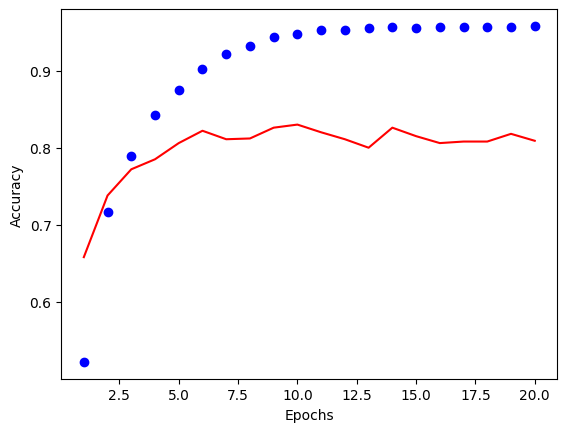

In [45]:
tr_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.clf()

n = range(1, len(tr_loss)+1)

plt.plot(n, tr_acc, 'bo', label="training_data_accuracy")
plt.plot(n, val_acc, 'r')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

After ~9 epochs the validation data does not improve further.

In [46]:
model2.fit(x_train, y_train, epochs=10,
          batch_size=512)

results = model2.evaluate(x_test, y_test)

Epoch 1/10
18/18 [==============================] - 0s 14ms/step - loss: 0.2169 - accuracy: 0.9414
Epoch 2/10
18/18 [==============================] - 0s 13ms/step - loss: 0.1640 - accuracy: 0.9469
Epoch 3/10
18/18 [==============================] - 0s 14ms/step - loss: 0.1434 - accuracy: 0.9511
Epoch 4/10
18/18 [==============================] - 0s 13ms/step - loss: 0.1366 - accuracy: 0.9547
Epoch 5/10
18/18 [==============================] - 0s 13ms/step - loss: 0.1337 - accuracy: 0.9532
Epoch 6/10
18/18 [==============================] - 0s 14ms/step - loss: 0.1247 - accuracy: 0.9555
Epoch 7/10
18/18 [==============================] - 0s 14ms/step - loss: 0.1237 - accuracy: 0.9572
Epoch 8/10
18/18 [==============================] - 0s 14ms/step - loss: 0.1208 - accuracy: 0.9566
Epoch 9/10
18/18 [==============================] - 0s 13ms/step - loss: 0.1146 - accuracy: 0.9564
Epoch 10/10
71/71 [==============================] - 0s 4ms/step - loss: 1.0665 - accuracy: 0.7939


In [47]:
results

[1.0665203332901, 0.7938557267189026]

In [48]:
predictions = model2.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [49]:
np.argmax(predictions[100])

41